In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import statistics
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import ndimage
import seaborn as sns 
import pandas as pd
import matplotlib

In [2]:
def gauss2D(x, m, C):
    k = 2
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = np.sqrt(((2 * np.pi)**k) * dC)
    return num/den

In [3]:
def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 7, nx)
    y = np.linspace(-5, 7, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

In [4]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den
    return X, Y, Z

In [5]:
U1 = np.random.randn(200,2)
U2 = np.random.randn(200,2)

In [6]:
m1 = np.array([0,3], np.float32)
m2 = np.array([3,2.5], np.float32)
C1 = np.array([[2,1], [1,2]], np.float32)
C2 = np.array([[2,1], [1,2]], np.float32)
C = np.array([[2,1], [1,2]], np.float32)

A1 = np.linalg.cholesky(C1)
Y1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
Y2 = U2 @ A2.T + m2

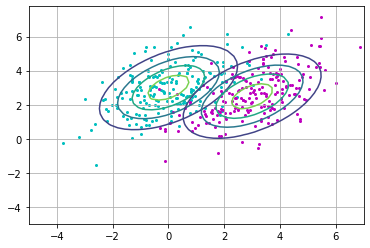

In [7]:
nx, ny = 50, 40
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(Y1[:,0], Y1[:,1], c="c", s=4)
plt.scatter(Y2[:,0], Y2[:,1], c="m", s=4)
plt.grid()
plt.show()

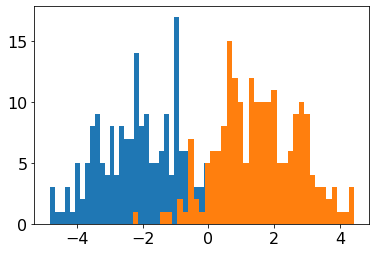

In [8]:
Ci = np.linalg.inv(2*C)
uF = Ci @ (m2-m1)
uF2=[0.98639392383,-0.1643989873]
uF3=np.random.randn(2)

yp1 = Y1 @ uF
yp2 = Y2 @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

In [9]:
uF3

array([-0.86600153,  1.50657403])

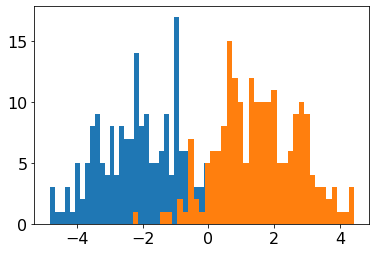

In [10]:
yp12 = Y1 @ uF2
yp22 = Y2 @ uF2
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

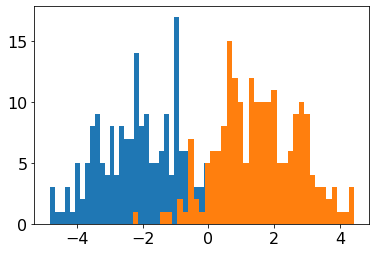

In [11]:
yp13 = Y1 @ uF3
yp23 = Y2 @ uF3
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

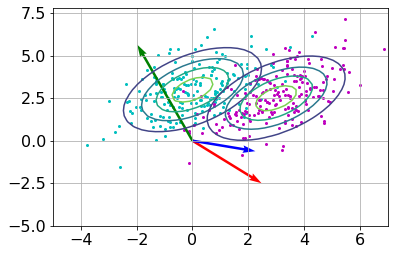

In [12]:
V = np.array([[ 1.0833334, -0.6666667], [0.98639392383,-0.1643989873],uF3])
V=V*4
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(Y1[:,0], Y1[:,1], c="c", s=4)
plt.scatter(Y2[:,0], Y2[:,1], c="m", s=4)
plt.grid()

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

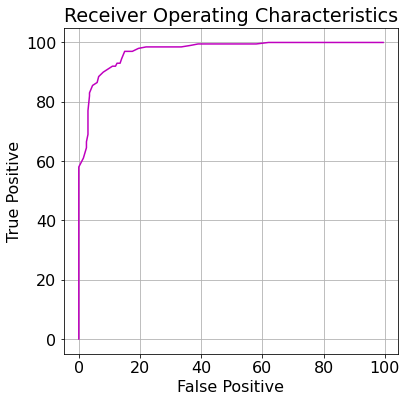

In [13]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# Set up an array of thresholds
#
nRocPoints = 100;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

In [14]:
x=np.trapz(ROC,axis=0,dx=1)
print(x)
print(x[0]+x[1])
print(x[0]/(x[0]+x[1]))

[6799.5  3092.75]
9892.25
0.6873562637418181


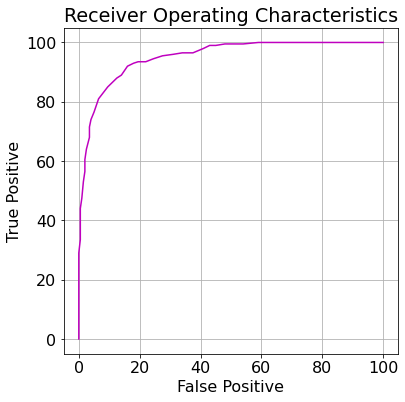

In [15]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp12), np.min(yp22) )))
pmax = np.max( np.array( (np.max(yp12), np.max(yp22) )))
# Set up an array of thresholds
#
nRocPoints = 100;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp22[yp22 > thresh]) * 100 / len(yp22)
    FP = len(yp12[yp12 > thresh]) * 100 / len(yp12)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

In [16]:
x=np.trapz(ROC,axis=0,dx=1)
print(x)
print(x[0]+x[1])
print(x[0]/(x[0]+x[1]))

[6826.5 4030.5]
10857.0
0.6287648521691075


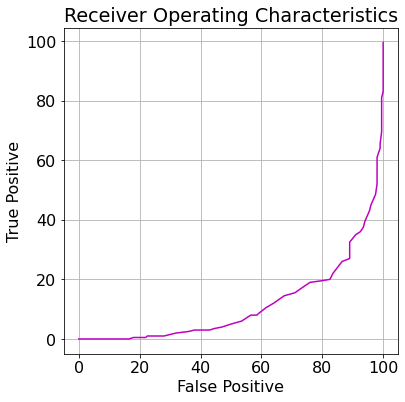

In [17]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp13), np.min(yp23) )))
pmax = np.max( np.array( (np.max(yp13), np.max(yp23) )))
# Set up an array of thresholds
#
nRocPoints = 100;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp23[yp23 > thresh]) * 100 / len(yp23)
    FP = len(yp13[yp13 > thresh]) * 100 / len(yp13)
    ROC[i,:] = [TP, FP]
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
plt.savefig('rocCurve.png')

In [18]:
x=np.trapz(ROC,axis=0,dx=1)
print(x)
print(x[0]+x[1])
print(x[0]/(x[0]+x[1]))

[3775.25 6157.  ]
9932.25
0.38010017871076546


In [19]:
x2=np.zeros([100])
for i in range (len(x2)):
    x2[i]=100
x3=np.trapz(x2,axis=0,dx=1)
print(x3)

9900.0
